## Training with traditional machine learning models

In [ ]:
import pandas as pd

df_train = pd.read_csv("/content/drive/MyDrive/cust_seg_df_train_scaled_encoded.csv")

In [ ]:
df_train

,Work_Experience,Family_Size,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,Profession_Artist,Profession_Doctor,...,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,Segmentation_A,Segmentation_B,Segmentation_C,Segmentation_D
0,0.071429,0.375,0,1,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0.071429,0.000,1,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
2,0.000000,0.125,0,1,0,1,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
3,0.000000,0.125,0,1,0,1,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
4,0.071429,0.250,0,1,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6660,0.000000,0.500,0,1,0,1,0,1,1,0,...,0,0,0,0,1,0,0,1,0,0
6661,0.214286,0.375,0,1,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
6662,0.071429,0.000,1,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
6663,0.071429,0.375,1,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0


In [ ]:
# Splitting dataset

from sklearn.model_selection import train_test_split

Target = ['Segmentation_A', 'Segmentation_B', 'Segmentation_C', 'Segmentation_D']

# Assuming 'Target' is  actual target column name
X = df_train.drop(Target, axis=1)  # Features
y = df_train[Target]  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

### KNN

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.3743435858964741

### NB

In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)

# Decoding one-hot encode for NB to support
y_train = np.argmax(y_train, axis=1)
y_test = np.argmax(y_test, axis=1)

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.5018754688672168

### XGB

In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)


In [ ]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)

y_pred = xgb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.4988747186796699

### RF

In [ ]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.3705926481620405

### DT

In [ ]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.36159039759939987

### SVC

In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)

# Decoding one-hot encode for SVC to support
y_train = np.argmax(y_train, axis=1)
y_test = np.argmax(y_test, axis=1)

svc_classifier = SVC()
svc_classifier.fit(X_train, y_train)

y_pred = svc_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.4988747186796699

### Ensemble lesrning (using NB and KNN)

In [ ]:
# Averaging method

# Initialize individual classifiers
knn_classifier = KNeighborsClassifier(n_neighbors=5)
nb_classifier = MultinomialNB()

y_train = np.array(y_train)
y_test = np.array(y_test)

# Decoding one-hot encode for NB to support
y_train = np.argmax(y_train, axis=1)
y_test = np.argmax(y_test, axis=1)

# Train individual classifiers

#KNN
knn_classifier.fit(X_train, y_train)

#NB
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
knn_pred_proba = knn_classifier.predict_proba(X_test)
nb_pred_proba = nb_classifier.predict_proba(X_test)

# Ensemble by averaging class probabilities
ensemble_pred_proba = (knn_pred_proba + nb_pred_proba) / 2

# Convert probabilities to class labels
ensemble_pred_labels = np.argmax(ensemble_pred_proba, axis=1)

# Evaluate accuracy
ensemble_accuracy = accuracy_score(y_test, ensemble_pred_labels)
print("Ensemble Accuracy:", ensemble_accuracy)

Ensemble Accuracy: 0.5041260315078769


## We see that traditional models can not perform well due to complexity of the dataset and high number of classes

## Using Dimension reduction methods to improve accuracy
### [Resource](https://www.kaggle.com/code/lucasbruzzone/using-ica-to-improve-accuracy-0-99-accuracy)

In [ ]:
import pandas as pd

# Importing original dataset
df = pd.read_csv("/content/Train.csv")

In [ ]:
# Dropping Null values
df.dropna(inplace=True)

In [ ]:
# Removing useless columns
df = df.drop(columns=["ID"], axis=1)

In [ ]:
df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
5,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
...,...,...,...,...,...,...,...,...,...,...
8062,Male,Yes,41,Yes,Artist,0.0,High,5.0,Cat_6,B
8064,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label encoding categorical values
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
label_encoder_mappings = {}
le = LabelEncoder()

# Encode categorical columns
for col in cat_cols:
  df[col] = le.fit_transform(df[col])
  label_encoder_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

In [ ]:
label_encoder_mappings

{'Gender': {'Female': 0, 'Male': 1},
 'Ever_Married': {'No': 0, 'Yes': 1},
 'Graduated': {'No': 0, 'Yes': 1},
 'Profession': {'Artist': 0,
  'Doctor': 1,
  'Engineer': 2,
  'Entertainment': 3,
  'Executive': 4,
  'Healthcare': 5,
  'Homemaker': 6,
  'Lawyer': 7,
  'Marketing': 8},
 'Spending_Score': {'Average': 0, 'High': 1, 'Low': 2},
 'Var_1': {'Cat_1': 0,
  'Cat_2': 1,
  'Cat_3': 2,
  'Cat_4': 3,
  'Cat_5': 4,
  'Cat_6': 5,
  'Cat_7': 6},
 'Segmentation': {'A': 0, 'B': 1, 'C': 2, 'D': 3}}

In [ ]:
# Checking correlations

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_corr(df, target):
  corr = df.corr(numeric_only=True)
  target_corr = corr[target].drop(target).sort_values(ascending=False)

  # Select features with correlation values greater than or equal to 0.05 in absolute value
  target_corr_filtered = target_corr[abs(target_corr) >= 0.1]

  # Set the style and palette for the heatmap
  sns.set(font_scale=0.8)
  sns.set_style("white")
  sns.set_palette("PuBuGn_d")

  # Create a heatmap with the selected features
  sns.heatmap(target_corr_filtered.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
  plt.title(f'Correlation with Segmentation')
  plt.show()

  return target_corr_filtered.index.tolist()

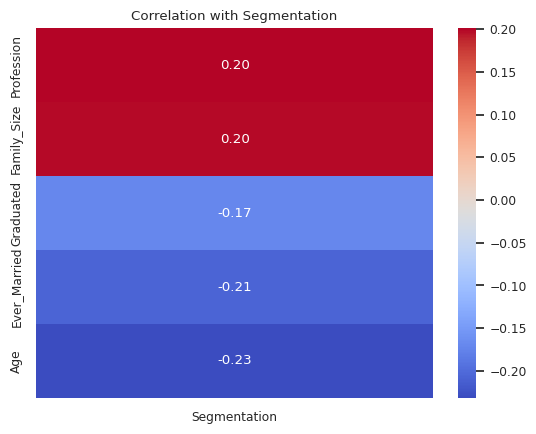

['Profession', 'Family_Size', 'Graduated', 'Ever_Married', 'Age']

In [ ]:
target_corr_filtered = plot_corr(df, 'Segmentation')
target_corr_filtered

In [ ]:
# Dimension Reduction

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA, NMF, FastICA
from mpl_toolkits.mplot3d import Axes3D

class Decomp:
    def __init__(self, n_components, method="pca", scaler_method='standard'):
        self.n_components = n_components
        self.method = method
        self.scaler_method = scaler_method
        self.mixing_ = None

    def dimension_reduction(self, df):
        X_reduced = self.dimension_method(df)
        if self.n_components == 2:
            df_comp = pd.DataFrame(X_reduced, columns=[f'{self.method.upper()}_{_}' for _ in range(self.n_components)], index=df.index)
        elif self.n_components == 3:
            df_comp = pd.DataFrame(X_reduced, columns=[f'{self.method.upper()}_{_}' for _ in range(self.n_components)], index=df.index)
        return df_comp

    def dimension_method(self, df):
        X = self.scaler(df)
        if self.method == "pca":
            pca = PCA(n_components=self.n_components, random_state=0)
            X_reduced = pca.fit_transform(X)
            self.comp = pca
        elif self.method == "nmf":
            nmf = NMF(n_components=self.n_components, random_state=0)
            X_reduced = nmf.fit_transform(X)
        elif self.method == "ica":
            comp = FastICA(n_components=self.n_components, whiten='unit-variance', random_state=0)
            X_reduced = comp.fit_transform(X)
            self.mixing_ = comp.mixing_  # Store the mixing_ matrix
        else:
            raise ValueError(f"Invalid method name: {method}")


        return X_reduced

    def get_mixing_matrix(self):
        if self.method == "ica":
            return self.mixing_
        else:
            raise ValueError("Mixing matrix is only available for ICA dimensionality reduction method.")


    def scaler(self, df):
        _df = df.copy()
        if self.scaler_method == "standard":
            return StandardScaler().fit_transform(_df)
        elif self.scaler_method == "minmax":
            return MinMaxScaler().fit_transform(_df)
        elif self.scaler_method == None:
            return _df.values
        else:
            raise ValueError(f"Invalid scaler_method name")

    def get_columns(self):
        return [f'{self.method.upper()}_{_}' for _ in range(self.n_components)]

    def get_explained_variance_ratio(self):
        return np.sum(self.comp.explained_variance_ratio_)

    def transform(self, df):
        X = self.scaler(df)
        X_reduced = self.comp.transform(X)
        if self.n_components == 2:
            df_comp = pd.DataFrame(X_reduced, columns=[f'{self.method.upper()}_{_}' for _ in range(self.n_components)], index=df.index)
        elif self.n_components == 3:
            df_comp = pd.DataFrame(X_reduced, columns=[f'{self.method.upper()}_{_}' for _ in range(self.n_components)], index=df.index)
        return df_comp

    def decomp_plot(self, tmp, label, hue='genre'):
        if self.n_components == 2:
            # Gráfico 2D
            plt.figure(figsize=(16, 9))
            sns.scatterplot(x=f"{label}_0", y=f"{label}_1", data=tmp, hue=hue, alpha=0.7, s=100, palette='coolwarm');
            plt.title(f'{label} on {hue}', fontsize=20)
            plt.xticks(fontsize=14)
            plt.yticks(fontsize=10)
            plt.xlabel(f"{label} Component 1", fontsize=15)
            plt.ylabel(f"{label} Component 2", fontsize=15)
        elif self.n_components == 3:
            # Gráfico 3D
            fig = plt.figure(figsize=(16, 9))
            ax = fig.add_subplot(111, projection='3d')
            scatter = ax.scatter(tmp[f"{label}_0"], tmp[f"{label}_1"], tmp[f"{label}_2"], c=tmp[hue], cmap='coolwarm', s=100)
            ax.set_xlabel(f"{label} Component 1", fontsize=15)
            ax.set_ylabel(f"{label} Component 2", fontsize=15)
            ax.set_zlabel(f"{label} Component 3", fontsize=15)
            plt.title(f'{label} on {hue} (3D)', fontsize=20)
            fig.colorbar(scatter)
        plt.show()



In [ ]:
# Clusterigng with entire data

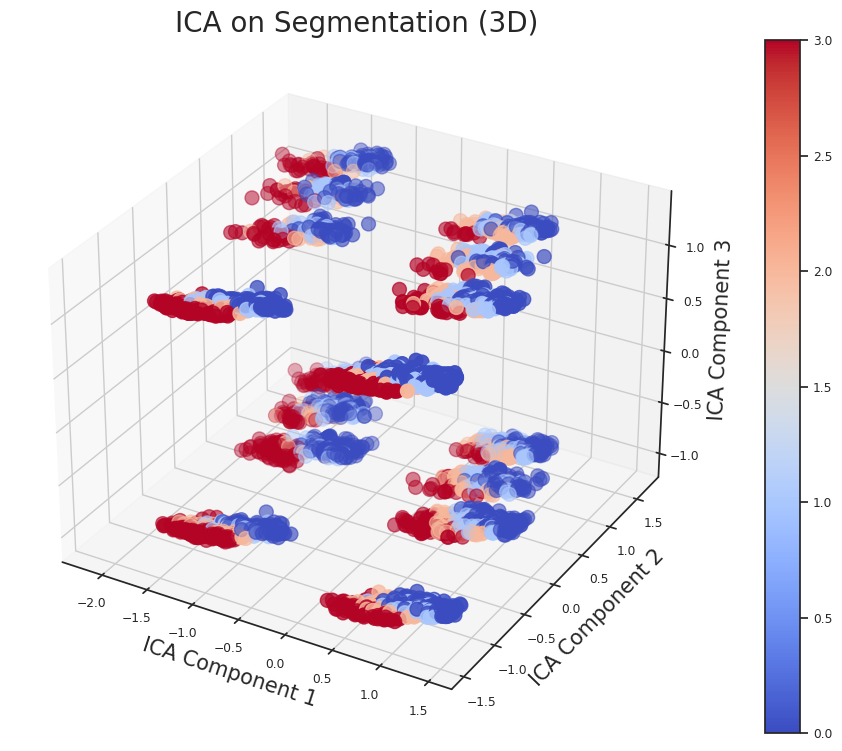

In [ ]:
data = df.copy()
method = 'ica'

decomp = Decomp(n_components=3, method=method, scaler_method='minmax')
decomp_feature = decomp.dimension_reduction(data)
decomp_feature = pd.concat([df['Segmentation'], decomp_feature], axis=1)
decomp.decomp_plot(decomp_feature, method.upper(), 'Segmentation')


In [ ]:
# Clustering with most important features

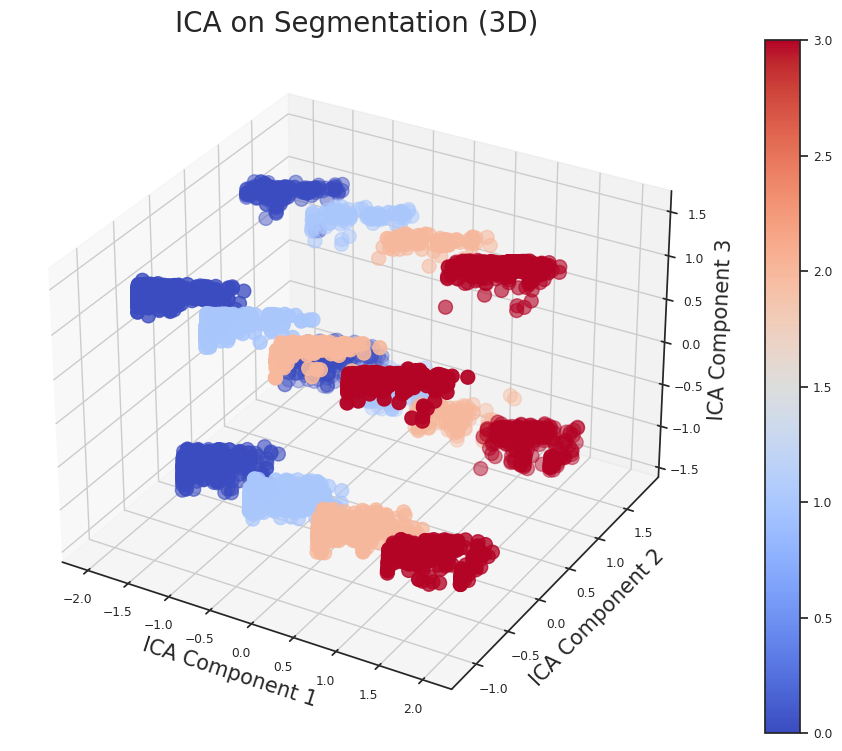

In [ ]:
df_filtered = df[target_corr_filtered + ['Segmentation']]

data = df_filtered.copy()
method = 'ica'

decomp = Decomp(n_components=3, method=method, scaler_method='minmax')
decomp_feature = decomp.dimension_reduction(data)
decomp_feature = pd.concat([df_filtered['Segmentation'], decomp_feature], axis=1)
decomp.decomp_plot(decomp_feature, method.upper(), 'Segmentation')


In [ ]:
df_filtered

,Profession,Family_Size,Graduated,Ever_Married,Age,Segmentation
0,5,4.0,0,0,22,3
2,2,1.0,1,1,67,1
3,7,2.0,1,1,67,1
5,0,2.0,0,1,56,2
6,5,3.0,1,0,32,2
...,...,...,...,...,...,...
8062,0,5.0,1,1,41,1
8064,4,4.0,0,0,35,3
8065,5,1.0,1,0,33,3
8066,5,4.0,1,0,27,1


In [ ]:
train_ica = decomp_feature.copy()
#mixing_matrix = decomp.get_mixing_matrix()

In [ ]:
train_ica

,Segmentation,ICA_0,ICA_1,ICA_2
0,3,1.067229,1.214879,1.083391
2,1,-0.327626,-0.685327,-0.863933
3,1,0.096255,-0.376595,-0.957049
5,2,0.024273,1.168215,-0.972385
6,2,0.557729,-0.753778,1.236079
...,...,...,...,...
8062,1,-0.362255,-0.711754,-0.633206
8064,3,0.985303,1.152901,1.000562
8065,3,1.367058,-0.859044,1.185935
8066,1,-0.279972,-0.667327,1.319282


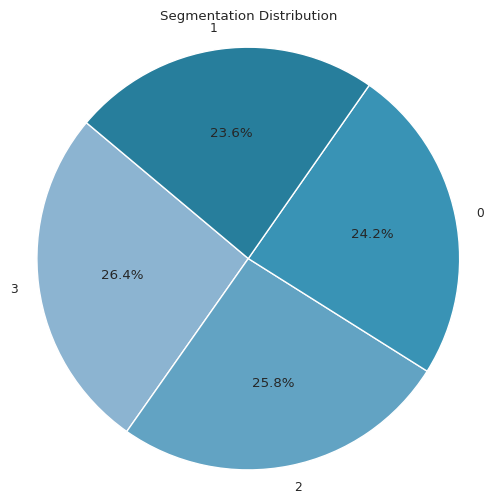

In [ ]:
# Checking class distribution

segment_counts = df_filtered['Segmentation'].value_counts()

# Plotting
plt.figure(figsize=(6, 6))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Segmentation Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Training (Traditional)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

In [ ]:
X = train_ica.drop('Segmentation', axis=1).values
y = train_ica["Segmentation"].values

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Random Forest

random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)
random_forest_predictions = random_forest_model.predict(X_test)
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
print(f"Random Forest Accuracy: {random_forest_accuracy:.2f}")

# C5 (Decision Tree)
c5_model = DecisionTreeClassifier(random_state=42)
c5_model.fit(X_train, y_train)
c5_predictions = c5_model.predict(X_test)
c5_accuracy = accuracy_score(y_test, c5_predictions)
print(f"C5 Accuracy: {c5_accuracy:.2f}")

# HistGradientBoostingClassifier
hist_gradient_boosting_model = HistGradientBoostingClassifier(random_state=42)
hist_gradient_boosting_model.fit(X_train, y_train)
hist_gradient_boosting_predictions = hist_gradient_boosting_model.predict(X_test)
hist_gradient_boosting_accuracy = accuracy_score(y_test, hist_gradient_boosting_predictions)
print(f"HistGradientBoostingClassifier Accuracy: {hist_gradient_boosting_accuracy:.2f}")

# KNN (K-Nearest Neighbors)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f"KNN Accuracy: {knn_accuracy:.2f}")

# XGB
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)
y_pred = xgb_classifier.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred)
print(f"XGB Accuracy: {xgb_accuracy:.2f}")

Random Forest Accuracy: 1.00
C5 Accuracy: 1.00
HistGradientBoostingClassifier Accuracy: 1.00
KNN Accuracy: 1.00
XGB Accuracy: 1.00


## Evaluation on test set

In [ ]:
test_df = pd.read_csv("/content/Test.csv")

In [ ]:
test_df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,B
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,A
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6,C
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,C


### Preprocessing (Exactly like the train set)

In [ ]:
# Dropping Null values
test_df.dropna(inplace=True)

# Removing useless columns
test_df = test_df.drop(columns=["ID"], axis=1)

# Label encoding categorical values
num_cols = test_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = test_df.select_dtypes(include=['object']).columns.tolist()
label_encoder_mappings = {}
le = LabelEncoder()

# Encode categorical columns
for col in cat_cols:
  test_df[col] = le.fit_transform(test_df[col])
  label_encoder_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

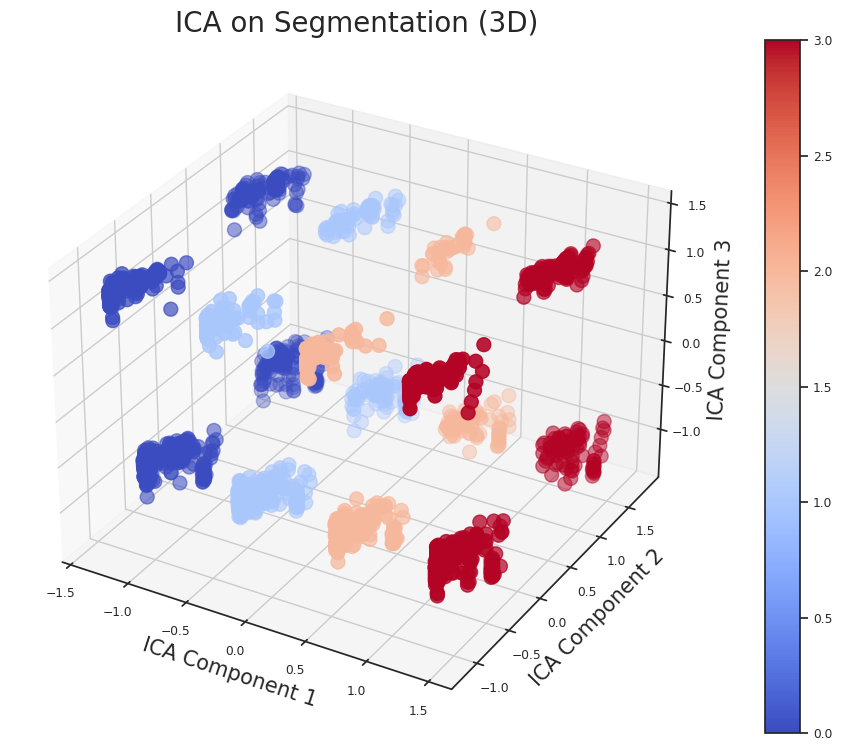

In [ ]:
# Clustering on most important features (Using same features that we used for training)
test_df_filtered = test_df[target_corr_filtered + ['Segmentation']]

data = test_df_filtered.copy()
method = 'ica'

decomp = Decomp(n_components=3, method=method, scaler_method='minmax')
decomp_feature = decomp.dimension_reduction(data)
decomp_feature = pd.concat([test_df_filtered['Segmentation'], decomp_feature], axis=1)
decomp.decomp_plot(decomp_feature, method.upper(), 'Segmentation')


In [ ]:
test_ica = decomp_feature.copy()
#mixing_matrix = decomp.get_mixing_matrix()

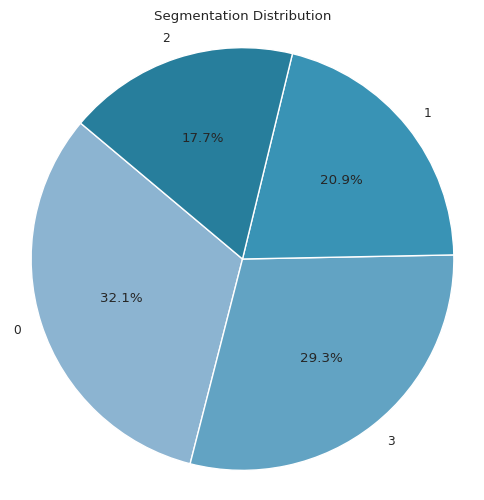

In [ ]:
# Checking class distribution

segment_counts = test_ica['Segmentation'].value_counts()

# Plotting
plt.figure(figsize=(6, 6))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Segmentation Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
test_ica['Segmentation'].value_counts()

0    692
3    631
1    450
2    381
Name: Segmentation, dtype: int64

In [ ]:
# Classes are not as balanced as expected so we do undersampling

In [ ]:
# Calculate the minimum count among all classes
min_count = test_ica['Segmentation'].value_counts().min()

# Group the DataFrame by 'Segmentation'
grouped = test_ica.groupby('Segmentation')

# Undersample each group to the minimum count
undersampled_df = grouped.apply(lambda x: x.sample(min_count)).reset_index(drop=True)

# Shuffle the undersampled DataFrame
test_ica = undersampled_df.sample(frac=1).reset_index(drop=True)

test_ica

,Segmentation,ICA_0,ICA_1,ICA_2
0,3,1.205089,1.257042,1.141867
1,1,-0.285243,-0.602069,-0.647553
2,1,-0.448900,1.012632,-0.825479
3,3,1.375139,-0.502099,-0.677375
4,0,-1.258060,1.288505,1.159718
...,...,...,...,...
1519,0,-1.068623,-0.387203,-0.618868
1520,0,-1.167156,-0.775658,-0.843403
1521,2,0.473044,-0.841055,-0.685176
1522,1,-0.440696,1.326641,1.148585


In [ ]:
test_ica['Segmentation'].value_counts()

3    381
1    381
0    381
2    381
Name: Segmentation, dtype: int64

In [ ]:
X = test_ica.drop('Segmentation', axis=1).values
y = test_ica["Segmentation"].values

In [ ]:
# Random Forest
random_forest_predictions = random_forest_model.predict(X)
random_forest_accuracy = accuracy_score(y, random_forest_predictions)
print(f"Random Forest Accuracy: {random_forest_accuracy:.2f}")

# C5 (Decision Tree)
c5_predictions = c5_model.predict(X)
c5_accuracy = accuracy_score(y, c5_predictions)
print(f"C5 Accuracy: {c5_accuracy:.2f}")

# HistGradientBoostingClassifier
hist_gradient_boosting_predictions = hist_gradient_boosting_model.predict(X)
hist_gradient_boosting_accuracy = accuracy_score(y, hist_gradient_boosting_predictions)
print(f"HistGradientBoostingClassifier Accuracy: {hist_gradient_boosting_accuracy:.2f}")

# KNN (K-Nearest Neighbors)
knn_predictions = knn_model.predict(X)
knn_accuracy = accuracy_score(y, knn_predictions)
print(f"KNN Accuracy: {knn_accuracy:.2f}")

# XGB
y_pred = xgb_classifier.predict(X)
xgb_accuracy = accuracy_score(y, y_pred)
print(f"XGB Accuracy: {xgb_accuracy:.2f}")

Random Forest Accuracy: 0.99
C5 Accuracy: 0.88
HistGradientBoostingClassifier Accuracy: 0.96
KNN Accuracy: 0.94
XGB Accuracy: 0.95
